In [1]:
import pandas as pd

In [3]:
df1= pd.read_csv("./data/title_basics.tsv",sep='\t')
df= pd.read_csv("./data/title_rating.tsv",sep='\t')
df2 = df1.merge(df,how = 'inner',on='tconst')

/Users/juliacooper/opt/anaconda3/envs/bootcamp/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df= pd.read_csv("./data/title_akas.tsv",sep='\t')
df = df.groupby(by="titleId").count()
df.reset_index(inplace=True)
df=df[['titleId','language']]
df= df.rename(columns={'titleId':'tconst'})
df2 = df2.merge(df, how = 'left', on = 'tconst')

/Users/juliacooper/opt/anaconda3/envs/bootcamp/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
df= pd.read_csv("./data/title_crew.tsv",sep='\t')
df2 =df2.merge(df,how='left',on='tconst')

In [6]:
df= pd.read_csv("./data/title_episode.tsv",sep='\t')
df2=df2.merge(df,how='left',on='tconst')

In [7]:
#replace NA , \N
df2.parentTconst.fillna("movie",inplace=True)
df2.seasonNumber.fillna(0,inplace=True)
df2.seasonNumber.replace(r"\\N",0,regex=True,inplace=True)
df2.episodeNumber.replace(r"\\N",0,regex=True,inplace=True)
df2.episodeNumber.fillna(0,inplace=True)
df2.writers.replace(r"\\N","unknown",regex=True,inplace=True)
df2.directors.replace(r"\\N","unknown",regex=True,inplace=True)
df2.language.fillna(1,inplace=True)
df2.genres.replace(r"\\N","unknown",regex=True,inplace=True)
df2.runtimeMinutes.replace(r"\\N",0,regex=True,inplace=True)
df2.endYear.replace(r"\\N",0,regex=True,inplace=True)
df2.startYear.replace(r"\\N",0,regex=True,inplace=True)
df2.runtimeMinutes.replace("Game-Show,Reality-TV",0,inplace=True)
df2.runtimeMinutes.replace("Game-Show",0,inplace=True)
df2.runtimeMinutes=pd.to_numeric(df2.runtimeMinutes)
#convert data type
df2.isAdult=pd.to_numeric(df2.isAdult)
df2.startYear=pd.to_numeric(df2.startYear)
df2.endYear=pd.to_numeric(df2.endYear)
df2.seasonNumber=pd.to_numeric(df2.seasonNumber)
df2.episodeNumber=pd.to_numeric(df2.episodeNumber)
df2.to_csv('./data/imdbdata.csv',index=False)
df2

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,language,directors,writers,parentTconst,seasonNumber,episodeNumber
0,tt0000001,short,Carmencita,Carmencita,0,1894,0,1,"Documentary,Short",5.7,1915,8.0,nm0005690,unknown,movie,0,0
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,0,5,"Animation,Short",5.8,259,8.0,nm0721526,unknown,movie,0,0
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,0,4,"Animation,Comedy,Romance",6.5,1720,9.0,nm0721526,unknown,movie,0,0
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,0,12,"Animation,Short",5.6,172,8.0,nm0721526,unknown,movie,0,0
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,0,1,"Comedy,Short",6.2,2537,12.0,nm0005690,unknown,movie,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1261829,tt9916690,tvEpisode,Horrid Henry Delivers the Milk,Horrid Henry Delivers the Milk,0,2012,0,10,"Adventure,Animation,Comedy",6.5,6,1.0,nm0996406,"nm1482639,nm2586970",tt0985991,3,47
1261830,tt9916720,short,The Nun 2,The Nun 2,0,2019,0,10,"Comedy,Horror,Mystery",5.3,265,14.0,nm10538600,unknown,movie,0,0
1261831,tt9916730,movie,6 Gunn,6 Gunn,0,2017,0,116,unknown,8.4,6,1.0,nm10538612,nm10538612,movie,0,0
1261832,tt9916766,tvEpisode,Episode #10.15,Episode #10.15,0,2019,0,43,"Family,Game-Show,Reality-TV",6.8,21,7.0,unknown,unknown,tt1442550,10,15


In [8]:
#consolidate the movie data files
# import os

# directory = os.fsencode('./themoviedb')
# count = 0
    
# for file in os.listdir(directory):
#     filename = os.fsdecode(file)
     
#     file = (f'./themoviedb/{filename}')
#     if count==0:
#         df = pd.read_csv(file)
#         count+=1
#     else:
#         df1 =pd.read_csv(file)
#         df = pd.concat([df,df1],ignore_index=True)
        
# df4 = pd.read_csv('./Julia/themoviedb_id_500000_to_600000.csv',
#                  lineterminator='\n')
# df = pd.concat([df,df4],ignore_index=True)
# df.to_csv('./data/themoviedb.csv', index=False)

In [9]:
#consolidate omdb data files
# import os

# directory = os.fsencode('./omdb')
# count = 0
    
# for file in os.listdir(directory):
#     filename = os.fsdecode(file)
     
#     file = (f'./omdb/{filename}')
#     if count==0:
#         df = pd.read_csv(file)
#         count+=1
#     else:
#         df1 =pd.read_csv(file)
#         df = pd.concat([df,df1],ignore_index=True)
# df.to_csv('./data/omdb.csv', index=False)

In [15]:
#read and merge 3 data sources
df2 = pd.read_csv('./data/imdbdata.csv')
df = pd.read_csv('./data/themoviedb.csv')
df.rename(columns={'imdb_id':'tconst'},inplace=True)
df2= df2.merge(df,how='inner',on='tconst')
df2=df2.loc[df2.startYear>=2017,:]
df2=df2.loc[df2.titleType=='movie',:]
# df2.to_csv('./data/subset_movie_data_new.csv',index=False)
df = pd.read_csv('./data/omdb.csv')
df2= df2.merge(df,how='inner',on='tconst')

In [16]:
#export to raw data
df2.to_csv('./data/raw_consolidate_data.csv',index=False)


In [52]:
#clean up raw data
df2 =pd.read_csv('./data/raw_consolidate_data.csv')
# remove columns
df2=df2.drop(['titleType','originalTitle','endYear','directors','writers','seasonNumber',
              'episodeNumber','parentTconst','themoviedb_id','status','Director', 'Writer',
              'overview','Plot','DVD','production_companies_id','numVotes','rating1source',
       'rating1value', 'rating2source', 'rating2value', 'rating3source',
       'rating3value','Metascore','popularity','original_language','production_companies_name','production_countries',
       'Awards','BoxOffice','revenue','vote_average','vote_count'],axis=1)
#filter out aldult movies
df2 =df2.loc[(df2.isAdult==0) ,:]
df2['language']=df2['language'].astype(int)
df2.belongs_to_collection.fillna(0,inplace=True)
df2.head()

,tconst,primaryTitle,isAdult,startYear,runtimeMinutes,genres,averageRating,language,belongs_to_collection,budget,Rated,Actors,Released
0,tt0013274,Istoriya grazhdanskoy voyny,0,2021,133,Documentary,6.4,7,0,0.0,NaN,NaN,10 May 2022
1,tt0062336,The Tango of the Widower and Its Distorting Mi...,0,2020,70,Drama,6.4,10,0,0.0,NaN,"Rubén Sotoconil, Claudia Paz, Luis Alarcón",23 Sep 2020
2,tt0069049,The Other Side of the Wind,0,2018,122,Drama,6.7,22,0,12000000.0,R,"John Huston, Oja Kodar, Peter Bogdanovich",02 Nov 2018
3,tt0083060,The Drive to Win,0,2019,0,"Drama,Sport",6.6,3,0,0.0,NaN,"Shanshan Chang, Bichuan Guo, Yunhui Jiang",07 Apr 2019
4,tt0100275,The Wandering Soap Opera,0,2017,80,"Comedy,Drama,Fantasy",6.4,8,0,0.0,NaN,"Luis Alarcón, Patricia Rivadeneira, Francisco ...",17 May 2019


In [53]:
#conver flag if movie is in collection
df2['is_in_collection'] = df2.apply(lambda x: 0 if x.belongs_to_collection==0 else 1, axis=1)
df2.head()


,tconst,primaryTitle,isAdult,startYear,runtimeMinutes,genres,averageRating,language,belongs_to_collection,budget,Rated,Actors,Released,is_in_collection
0,tt0013274,Istoriya grazhdanskoy voyny,0,2021,133,Documentary,6.4,7,0,0.0,NaN,NaN,10 May 2022,0
1,tt0062336,The Tango of the Widower and Its Distorting Mi...,0,2020,70,Drama,6.4,10,0,0.0,NaN,"Rubén Sotoconil, Claudia Paz, Luis Alarcón",23 Sep 2020,0
2,tt0069049,The Other Side of the Wind,0,2018,122,Drama,6.7,22,0,12000000.0,R,"John Huston, Oja Kodar, Peter Bogdanovich",02 Nov 2018,0
3,tt0083060,The Drive to Win,0,2019,0,"Drama,Sport",6.6,3,0,0.0,NaN,"Shanshan Chang, Bichuan Guo, Yunhui Jiang",07 Apr 2019,0
4,tt0100275,The Wandering Soap Opera,0,2017,80,"Comedy,Drama,Fantasy",6.4,8,0,0.0,NaN,"Luis Alarcón, Patricia Rivadeneira, Francisco ...",17 May 2019,0


In [54]:
#take month of release
x=df2.Released.str.split(' ',expand=True)
df2['release_month'] = x.iloc[:,1]
df2['release_month'] =  pd.to_datetime(df2['release_month'], format='%b')
df2['release_month'] = df2.apply(lambda x: x.release_month.month , axis=1)
df2.release_month.fillna(0,inplace=True)
df2['release_month']=df2['release_month'].astype(int)
df2.rename(columns={'language':'number_of_languages'},inplace=True)
df2.head()

,tconst,primaryTitle,isAdult,startYear,runtimeMinutes,genres,averageRating,number_of_languages,belongs_to_collection,budget,Rated,Actors,Released,is_in_collection,release_month
0,tt0013274,Istoriya grazhdanskoy voyny,0,2021,133,Documentary,6.4,7,0,0.0,NaN,NaN,10 May 2022,0,5
1,tt0062336,The Tango of the Widower and Its Distorting Mi...,0,2020,70,Drama,6.4,10,0,0.0,NaN,"Rubén Sotoconil, Claudia Paz, Luis Alarcón",23 Sep 2020,0,9
2,tt0069049,The Other Side of the Wind,0,2018,122,Drama,6.7,22,0,12000000.0,R,"John Huston, Oja Kodar, Peter Bogdanovich",02 Nov 2018,0,11
3,tt0083060,The Drive to Win,0,2019,0,"Drama,Sport",6.6,3,0,0.0,NaN,"Shanshan Chang, Bichuan Guo, Yunhui Jiang",07 Apr 2019,0,4
4,tt0100275,The Wandering Soap Opera,0,2017,80,"Comedy,Drama,Fantasy",6.4,8,0,0.0,NaN,"Luis Alarcón, Patricia Rivadeneira, Francisco ...",17 May 2019,0,5


In [55]:
#count number of popular actors/actress
df2.Actors = df2.Actors.str.lower()
x = df2.Actors.str.split(', ',expand=True).rename(columns={0:'A', 1:'B',2:'C',3:'D'})
popular = pd.read_csv('./data/popular_actor_actress.csv')
popular.names = popular.names.str.lower()
popular_names = popular.names.to_list()
x['popular1'] = x.apply(lambda y: 1 if y.A in popular_names else 0, axis=1)
x['popular2'] = x.apply(lambda y: 1 if y.B in popular_names else 0, axis=1)
x['popular3'] = x.apply(lambda y: 1 if y.C in popular_names else 0, axis=1)
x['popular4'] = x.apply(lambda y: 1 if y.D in popular_names else 0, axis=1)
x['popular']= x.popular1 + x.popular2 + x.popular3 + x.popular4
df2['popular_actors_count'] = x.iloc[:,8]
df2.head()

,tconst,primaryTitle,isAdult,startYear,runtimeMinutes,genres,averageRating,number_of_languages,belongs_to_collection,budget,Rated,Actors,Released,is_in_collection,release_month,popular_actors_count
0,tt0013274,Istoriya grazhdanskoy voyny,0,2021,133,Documentary,6.4,7,0,0.0,NaN,NaN,10 May 2022,0,5,0
1,tt0062336,The Tango of the Widower and Its Distorting Mi...,0,2020,70,Drama,6.4,10,0,0.0,NaN,"rubén sotoconil, claudia paz, luis alarcón",23 Sep 2020,0,9,0
2,tt0069049,The Other Side of the Wind,0,2018,122,Drama,6.7,22,0,12000000.0,R,"john huston, oja kodar, peter bogdanovich",02 Nov 2018,0,11,0
3,tt0083060,The Drive to Win,0,2019,0,"Drama,Sport",6.6,3,0,0.0,NaN,"shanshan chang, bichuan guo, yunhui jiang",07 Apr 2019,0,4,0
4,tt0100275,The Wandering Soap Opera,0,2017,80,"Comedy,Drama,Fantasy",6.4,8,0,0.0,NaN,"luis alarcón, patricia rivadeneira, francisco ...",17 May 2019,0,5,0


In [56]:

#encode rated columns
df2.Rated.fillna('unknown',inplace=True)
df2.replace({'Rated':{'TV-MA':'MA',
                      'TV-PG':'PG',
                      'Not Rated':'Unrated',
                      'TV-G':'G',
                      'APPROVED':'Approved',
                      'TV-13':'PG-13',
                      '0':'unknown',
                      'Open':'Unrated',
                      'MA-17':'MA',
                      'MA-13':'MA',
                      'M':'MA',
                      'TV-Y':'del','E10+':'del','NC-17':'del','12':'del','M/PG':'del','18':'del','X':'del','TV-Y7-FV':'del'
                      }},inplace=True)
df2 = df2.loc[(df2.Rated!='del'),:]
rate = df2.Rated.unique().tolist()
rate_counts=[]
for i in rate:
    df2[f'rated_{i}'] = df2.apply(lambda y: 1 if (y.Rated==f'{i}') else 0, axis=1)
    rate_counts.append(df2[f'rated_{i}'].sum())
    
df2.head()

,tconst,primaryTitle,isAdult,startYear,runtimeMinutes,genres,averageRating,number_of_languages,belongs_to_collection,budget,...,rated_unknown,rated_R,rated_MA,rated_Unrated,rated_PG,rated_TV-14,rated_PG-13,rated_G,rated_Approved,rated_TV-Y7
0,tt0013274,Istoriya grazhdanskoy voyny,0,2021,133,Documentary,6.4,7,0,0.0,...,1,0,0,0,0,0,0,0,0,0
1,tt0062336,The Tango of the Widower and Its Distorting Mi...,0,2020,70,Drama,6.4,10,0,0.0,...,1,0,0,0,0,0,0,0,0,0
2,tt0069049,The Other Side of the Wind,0,2018,122,Drama,6.7,22,0,12000000.0,...,0,1,0,0,0,0,0,0,0,0
3,tt0083060,The Drive to Win,0,2019,0,"Drama,Sport",6.6,3,0,0.0,...,1,0,0,0,0,0,0,0,0,0
4,tt0100275,The Wandering Soap Opera,0,2017,80,"Comedy,Drama,Fantasy",6.4,8,0,0.0,...,1,0,0,0,0,0,0,0,0,0


In [57]:
#encode genre columns
x = df2.genres.str.split(',',expand=True).rename(columns={0:'A', 1:'B',2:'C'})
genre1 = x.A.unique().tolist()
genre2 = x.B.unique().tolist()
genre3 = x.C.unique().tolist()
genre = genre1 + genre2 + genre3
genre = list(set(genre))
genre_counts = []
for i in genre:
    x[f'{i}'] = x.apply(lambda y: 1 if (y.A==f'{i}') or (y.B==f'{i}') or (y.C==f'{i}') else 0, axis=1)
    df2[f'genre_{i}'] = x[f'{i}']
    genre_counts.append(df2[f'genre_{i}'].sum())

df2=df2.drop(['belongs_to_collection','Released','isAdult','Actors','genres','Rated'],axis=1)

df2.head()

,tconst,primaryTitle,startYear,runtimeMinutes,averageRating,number_of_languages,budget,is_in_collection,release_month,popular_actors_count,...,genre_Biography,genre_War,genre_Sport,genre_Musical,genre_Drama,genre_Short,genre_Mystery,genre_Romance,genre_Thriller,genre_Animation
0,tt0013274,Istoriya grazhdanskoy voyny,2021,133,6.4,7,0.0,0,5,0,...,0,0,0,0,0,0,0,0,0,0
1,tt0062336,The Tango of the Widower and Its Distorting Mi...,2020,70,6.4,10,0.0,0,9,0,...,0,0,0,0,1,0,0,0,0,0
2,tt0069049,The Other Side of the Wind,2018,122,6.7,22,12000000.0,0,11,0,...,0,0,0,0,1,0,0,0,0,0
3,tt0083060,The Drive to Win,2019,0,6.6,3,0.0,0,4,0,...,0,0,1,0,1,0,0,0,0,0
4,tt0100275,The Wandering Soap Opera,2017,80,6.4,8,0.0,0,5,0,...,0,0,0,0,1,0,0,0,0,0


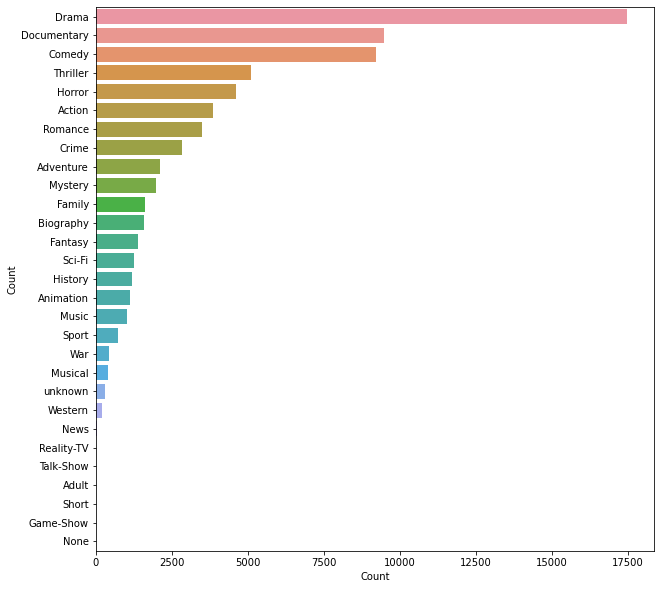

In [58]:
#plot highest to lowest by genre
all_genres = dict(zip(genre, genre_counts))
all_genres_df = pd.DataFrame({'Genre': genre, 'Count': genre_counts})
all_genres_df.fillna('None',inplace=True)
import matplotlib.pyplot as plt 
import seaborn as sns

g = all_genres_df.nlargest(columns="Count", n = 50) 
plt.figure(figsize=(10,10))
ax = sns.barplot(data=g, x= "Count", y = "Genre")
ax.set(ylabel = 'Count')
plt.show()




In [59]:
#clean up genre columns
remove_columns_genre = all_genres_df.loc[(all_genres_df.Count<=1624) & (all_genres_df.Genre!='unknown'),: ].Genre.unique()
for i in range(0,len(remove_columns_genre)):
    remove_columns_genre[i]= 'genre_'+ remove_columns_genre[i]
df2.drop(remove_columns_genre,axis=1,inplace=True)   


In [60]:
#move average rating to the end of the dataframe
df2['AverageRating']=df2.averageRating
df2.drop(columns=['averageRating'],inplace=True)

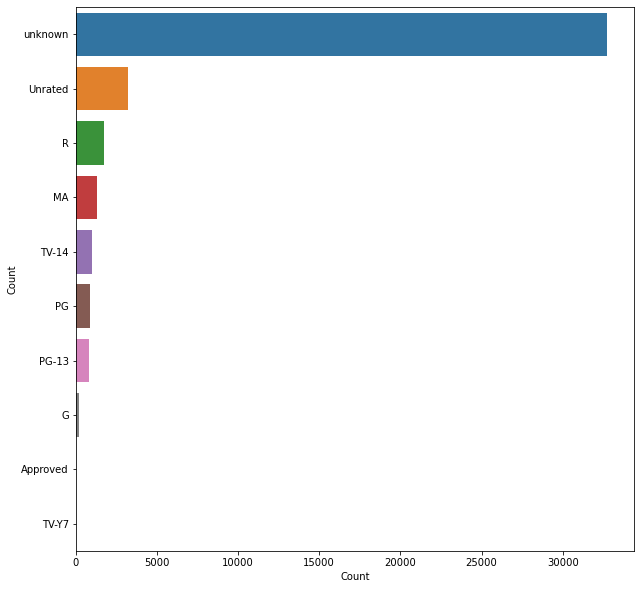

In [61]:
#plot highest to lowest by rated
all_rated = dict(zip(rate, rate_counts))
all_rated_counts = pd.DataFrame({'Rated': rate, 'Count': rate_counts})

# all_rated_counts.fillna('None',inplace=True)

r = all_rated_counts.nlargest(columns="Count", n = 50) 
plt.figure(figsize=(10,10))
ax = sns.barplot(data=r, x= "Count", y = "Rated")
ax.set(ylabel = 'Count')
plt.show()


In [62]:
#clean up rated columns, and create rating bins
df2.drop(['rated_Approved','rated_TV-Y7'],axis=1,inplace=True)
df2['budget']=df2['budget'].astype(int)
df2['rating_bins'] = pd.cut(df2.AverageRating, [0, 5, 6,7, 8, 10], labels=[0,1,2,3,4],  right=False)
df2 = df2.dropna(axis='columns', how='all')
df2 = df2.dropna()
df2['rating_bins']=df2['rating_bins'].astype(int)
df2.to_csv('./data/clean_raw_data.csv',index=False)

<AxesSubplot:>

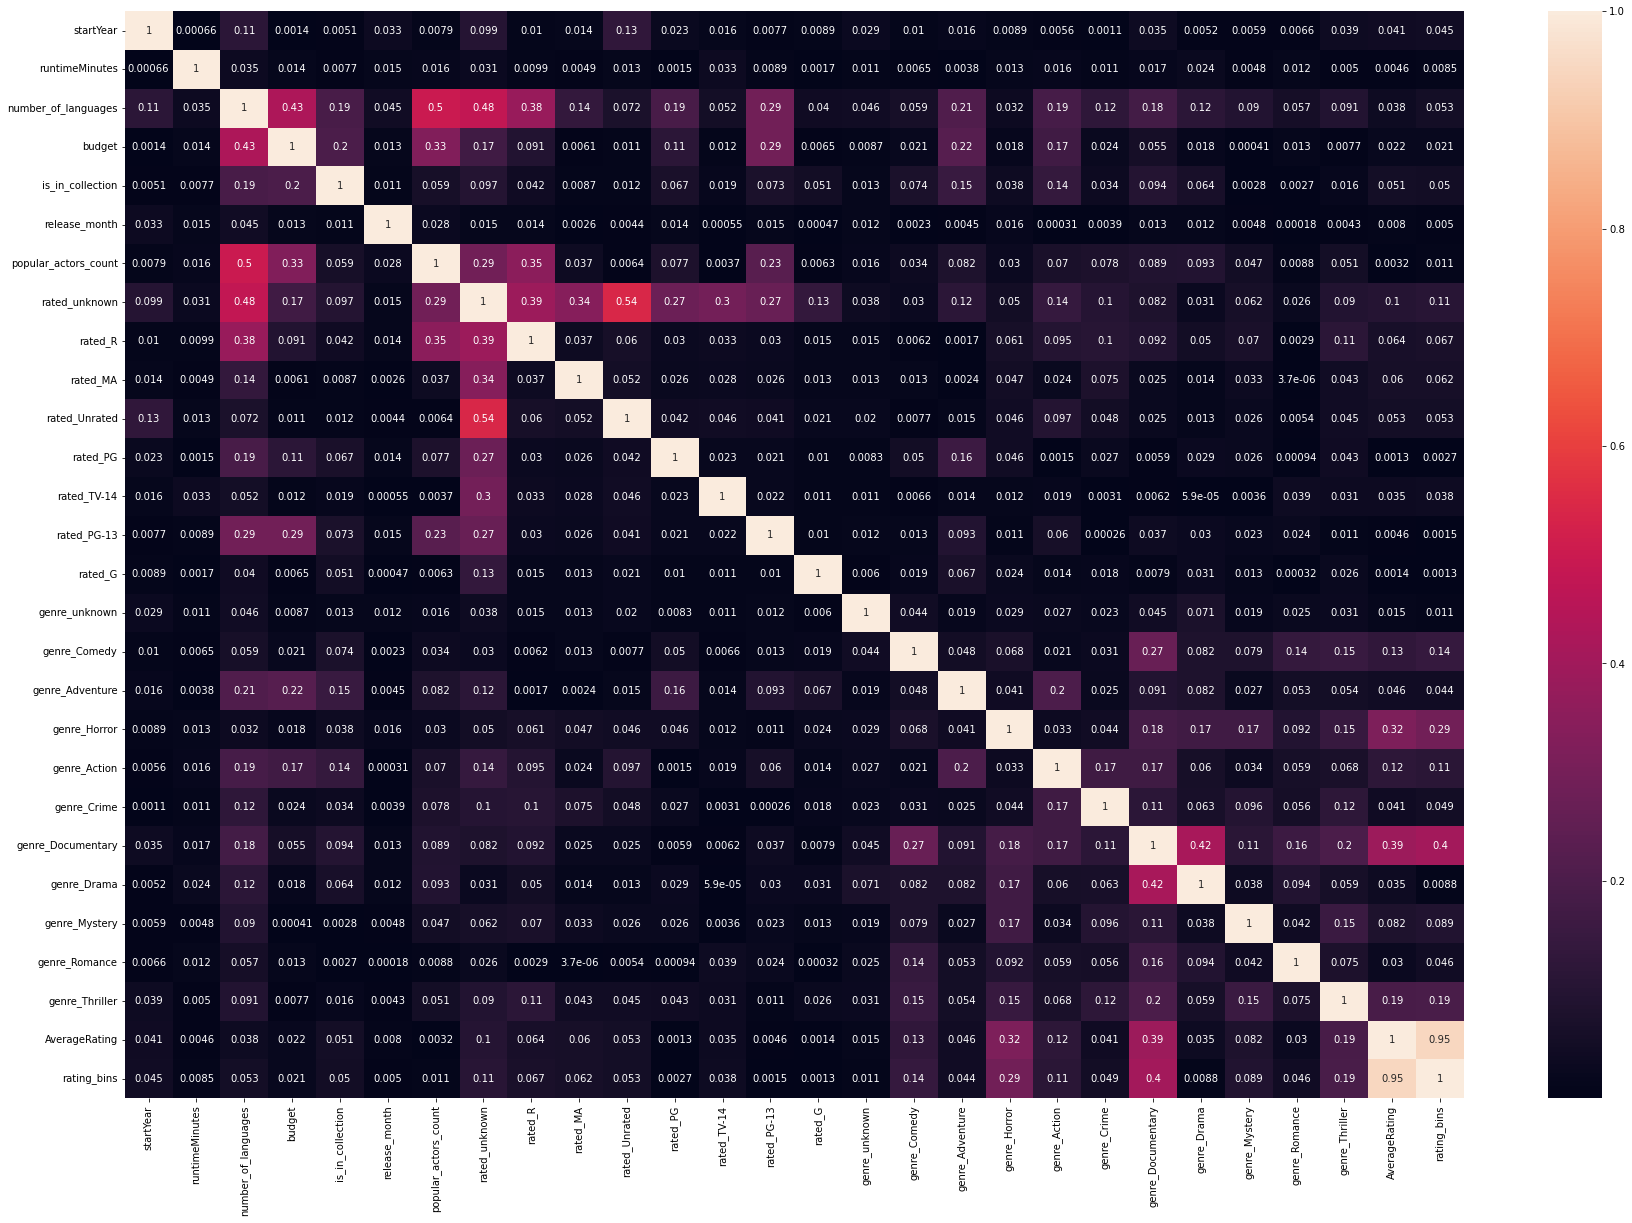

In [63]:
#heat map to show features correlation with average rating
plt.figure(figsize=(30,20))
sns.heatmap(df2.corr().abs(),annot=True)

Machine learning part

In [64]:
from sklearn.model_selection import train_test_split
df = pd.read_csv('./data/clean_raw_data.csv')
# Drop the null columns where all values are null
df = df.loc[df.runtimeMinutes<300,:]
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()

df

,tconst,primaryTitle,startYear,runtimeMinutes,number_of_languages,budget,is_in_collection,release_month,popular_actors_count,rated_unknown,...,genre_Horror,genre_Action,genre_Crime,genre_Documentary,genre_Drama,genre_Mystery,genre_Romance,genre_Thriller,AverageRating,rating_bins
0,tt0013274,Istoriya grazhdanskoy voyny,2021,133,7,0,0,5,0,1,...,0,0,0,1,0,0,0,0,6.4,2
1,tt0062336,The Tango of the Widower and Its Distorting Mi...,2020,70,10,0,0,9,0,1,...,0,0,0,0,1,0,0,0,6.4,2
2,tt0069049,The Other Side of the Wind,2018,122,22,12000000,0,11,0,0,...,0,0,0,0,1,0,0,0,6.7,2
3,tt0083060,The Drive to Win,2019,0,3,0,0,4,0,1,...,0,0,0,0,1,0,0,0,6.6,2
4,tt0100275,The Wandering Soap Opera,2017,80,8,0,0,5,0,1,...,0,0,0,0,1,0,0,0,6.4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42042,tt9916132,The Mystery of a Buryat Lama,2018,94,1,0,0,8,0,1,...,0,0,0,1,0,0,0,0,4.0,0
42043,tt9916190,Safeguard,2020,95,6,0,0,11,0,1,...,0,1,0,0,0,0,0,1,3.6,0
42044,tt9916270,Il talento del calabrone,2020,84,4,0,0,11,0,1,...,0,0,0,0,0,0,0,1,5.8,1
42045,tt9916362,Coven,2020,92,23,0,0,10,0,0,...,0,0,0,0,1,0,0,0,6.4,2


In [65]:
selected_features = df.iloc[:,2:28].values

In [66]:
y = df.iloc[:,29].values

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(selected_features, y, random_state=2,test_size=.7)

In [68]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [79]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200,max_features = 'sqrt',min_samples_leaf=2)
rf = rf.fit(X_train_scaled, y_train)


In [80]:
print(f"Training Data Score: {rf.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {rf.score(X_test_scaled, y_test)}")

Training Data Score: 0.81140455230391
Testing Data Score: 0.38794099653320646


Grid Search

In [38]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
search_space = {
    'n_estimators': [50,150,300],
    'max_features':['sqrt',0.8,0.2],
    'min_samples_leaf' : [1,2]
    
}

In [42]:
# Train the model with GridSearch
grid = GridSearchCV(rf, search_space, verbose=3)

In [43]:
grid.fit(X_train_scaled, y_train)

In [44]:
print(grid.best_params_)
print(grid.best_score_)

In [71]:
import joblib
joblib.dump(rf, "./random_forest.joblib")

['./random_forest.joblib']

In [73]:
rf.feature_importances_

array([0.1125954 , 0.24829057, 0.15533308, 0.02843505, 0.00773101,
       0.16442872, 0.01440138, 0.01784624, 0.00463896, 0.00518961,
       0.00976858, 0.00326419, 0.00390328, 0.00341377, 0.00066699,
       0.0017718 , 0.02237476, 0.00843633, 0.03912701, 0.01458257,
       0.01173737, 0.05937449, 0.02321696, 0.00815158, 0.01478526,
       0.01653504])

Other models

k: 1, Train/Test Score: 0.991/0.303
k: 3, Train/Test Score: 0.602/0.310
k: 5, Train/Test Score: 0.545/0.334
k: 7, Train/Test Score: 0.509/0.339
k: 9, Train/Test Score: 0.488/0.346
k: 11, Train/Test Score: 0.470/0.350
k: 13, Train/Test Score: 0.463/0.353
k: 15, Train/Test Score: 0.456/0.356
k: 17, Train/Test Score: 0.451/0.359
k: 19, Train/Test Score: 0.448/0.363
k: 21, Train/Test Score: 0.445/0.364
k: 23, Train/Test Score: 0.439/0.366
k: 25, Train/Test Score: 0.435/0.367
k: 27, Train/Test Score: 0.433/0.370
k: 29, Train/Test Score: 0.429/0.371
k: 31, Train/Test Score: 0.425/0.374
k: 33, Train/Test Score: 0.422/0.376
k: 35, Train/Test Score: 0.423/0.378
k: 37, Train/Test Score: 0.422/0.377
k: 39, Train/Test Score: 0.419/0.379


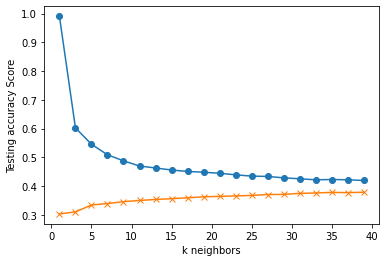

In [74]:
#KNN model
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [75]:
#SVM model
from sklearn.svm import SVC 
model = SVC(kernel='poly')
model.fit(X_train_scaled, y_train)
print('Test Acc: %.3f' % model.score(X_train_scaled, y_train))
print('Test Acc: %.3f' % model.score(X_test_scaled, y_test))

Test Acc: 0.440
Test Acc: 0.389


In [76]:
#Logistic Regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_scaled, y_train)
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")


Training Data Score: 0.3969386945832342
Testing Data Score: 0.39011623954863706


c:\Users\datqu\anaconda3\envs\bootcamp\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [77]:
#Naive Bayes Model
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
print(f"Training Data Score: {gnb.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {gnb.score(X_test_scaled, y_test)}")


Training Data Score: 0.2698072805139186
Testing Data Score: 0.2573244510910203


In [78]:
#scale range for web app later on
startyearMin = df.startYear.min()
startyearMax = df.startYear.max()
runtimeMinutesMin = df.runtimeMinutes.min()
runtimeMinutesMax = df.runtimeMinutes.max()
number_of_languagesMin = df.number_of_languages.min()
number_of_languagesMax = df.number_of_languages.max()
budgetMin = df.budget.min()
budgetMax = df.budget.max()
release_monthMin = df.release_month.min()
release_monthMax = df.release_month.max()
popular_actors_countMin = df.popular_actors_count.min()
popular_actors_countMax = df.popular_actors_count.max()

scale_dict = [startyearMin,startyearMax,runtimeMinutesMin,runtimeMinutesMax,number_of_languagesMin,number_of_languagesMax,budgetMin,budgetMax,
              release_monthMin,release_monthMax,popular_actors_countMin,popular_actors_countMax]
scale_dict

[2017, 2022, 0, 295, 1, 104, 0, 356000000, 0, 12, 0, 3]